In [33]:
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
import torch.optim as optim
import math
import torchvision.transforms as transforms
import numpy as np

device = torch.device('cuda')

def process_data(X,device=torch.device('cuda')):
    temp_x=[i[0] for i in X]#升维再导入
    data_x=torch.cat(temp_x).reshape(-1,3,32,32)
    data_y=torch.tensor([i[1] for i in X])
    return data_x.to(device),data_y.to(device)

# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform = transforms.Compose(
    [transforms.ToTensor()])  #不进行变换

mnist_train = torchvision.datasets.CIFAR10(
    root="../../data", train=True, transform=transform, download=True)
mnist_test = torchvision.datasets.CIFAR10(
    root="../../data", train=False, transform=transform, download=True)

(train_x0,train_y0)=process_data(mnist_train,device)
(test_x0,test_y0)=process_data(mnist_test,device)


Files already downloaded and verified
Files already downloaded and verified


In [34]:
train_y=torch.nn.functional.one_hot(train_y0, num_classes=10).to(torch.float32)
train_y

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [35]:
train_x0[0]

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

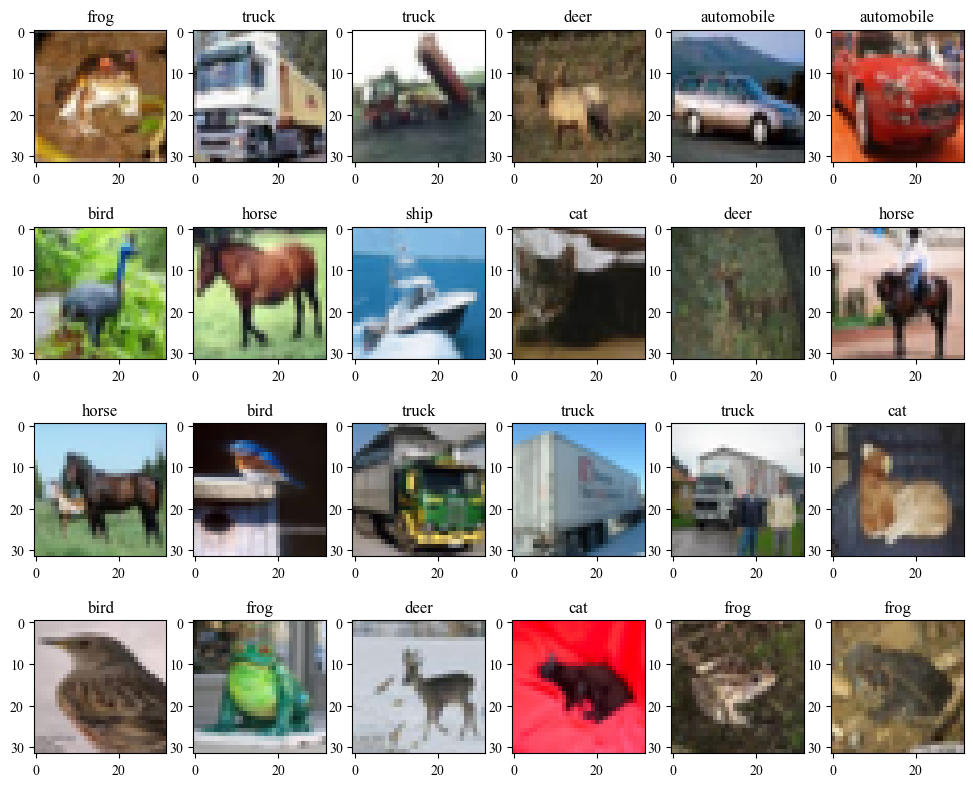

In [36]:
text_label = ["airplane"
                  ,"automobile"
                  ,"bird"
                  ,"cat"
                  ,"deer"
                  ,"dog"
                  ,"frog"
                  ,"horse"
                  ,"ship"
                  ,"truck"
                  ]

row_num=4
col_num=6
# plt.figure()
fig,ax=plt.subplots(row_num,col_num,figsize=(12,10),dpi=100)
for i in range(row_num):
    for j in range(col_num):
        data=train_x0[col_num*i+j].cpu()
        ax[i,j].imshow(np.transpose(data, (1, 2, 0)))
        ax[i,j].set_title(text_label[train_y0[col_num*i+j].cpu()])
plt.show()

In [4]:
patch_size=4
matrix = torch.tensor([[1, 2, 3, 4, 5, 6, 7, 8],
                   [9, 10, 11, 12, 13, 14, 15, 16],
                   [17, 18, 19, 20, 21, 22, 23, 24],
                   [25, 26, 27, 28, 29, 30, 31, 32],
                   [33, 34, 35, 36, 37, 38, 39, 40],
                   [41, 42, 43, 44, 45, 46, 47, 48],
                   [49, 50, 51, 52, 53, 54, 55, 56],
                   [57, 58, 59, 60, 61, 62, 63, 64]],dtype=torch.float32)
patches=nn.functional.unfold(matrix.unsqueeze(0).unsqueeze(1),kernel_size=(patch_size,patch_size),stride=patch_size).transpose(-1,-2)
torch.cat((torch.randn((1,1,16)),patches),dim=1)

tensor([[[ 1.4685e-02, -1.7926e+00,  8.8399e-02, -4.7016e-01, -1.3865e-01,
           5.2556e-01, -4.7929e-02, -1.7085e+00, -9.7822e-01,  4.2939e-01,
           3.9843e-01, -7.4142e-01, -7.3813e-01,  1.1838e+00,  1.8618e+00,
           5.7350e-01],
         [ 1.0000e+00,  2.0000e+00,  3.0000e+00,  4.0000e+00,  9.0000e+00,
           1.0000e+01,  1.1000e+01,  1.2000e+01,  1.7000e+01,  1.8000e+01,
           1.9000e+01,  2.0000e+01,  2.5000e+01,  2.6000e+01,  2.7000e+01,
           2.8000e+01],
         [ 5.0000e+00,  6.0000e+00,  7.0000e+00,  8.0000e+00,  1.3000e+01,
           1.4000e+01,  1.5000e+01,  1.6000e+01,  2.1000e+01,  2.2000e+01,
           2.3000e+01,  2.4000e+01,  2.9000e+01,  3.0000e+01,  3.1000e+01,
           3.2000e+01],
         [ 3.3000e+01,  3.4000e+01,  3.5000e+01,  3.6000e+01,  4.1000e+01,
           4.2000e+01,  4.3000e+01,  4.4000e+01,  4.9000e+01,  5.0000e+01,
           5.1000e+01,  5.2000e+01,  5.7000e+01,  5.8000e+01,  5.9000e+01,
           6.0000e+01],
    

In [3]:
patch_size=4
train_x=train_x0.unsqueeze(1)

patches=nn.functional.unfold(train_x,kernel_size=(patch_size,patch_size),stride=patch_size).transpose(-1,-2)
patches.shape

torch.Size([60000, 49, 16])

In [4]:
class MultiHeadAttention(nn.Module):
    def __init__(self,d_model,num_heads):
        super(MultiHeadAttention, self).__init__() #初始化 nn.Module
        assert d_model % num_heads == 0 # 能够等分 h 为头数目
        self.num_heads=num_heads
        self.d_model=d_model
        self.d_k = d_model // num_heads # key 通过类似CNN的多通道机制进行分离
        self.W_q = nn.Linear(d_model, d_model).to(device)
        self.W_k = nn.Linear(d_model, d_model).to(device)
        self.W_v = nn.Linear(d_model, d_model).to(device)
        self.W_o = nn.Linear(d_model, d_model).to(device)

    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k) # 表示对倒数第二个和最后一个维度进行转置。
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9) # 传入mask
        attn_probs = torch.softmax(attn_scores, dim=-1) #对dk进行
        output = torch.matmul(attn_probs, V)
        return output

    def split_heads(self, x):
        batch_size, seq_length, _ = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)#先分成两个维度 不破坏原始数据结构
        # (batch_size, self.h, seq_length, self.d_k)

    def combine_heads(self, x):
        batch_size, _, seq_length, _ = x.size() #split 的逆向操作
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)
        #.contiguous() 可以确保张量在内存中是按照顺序排列的，以便后续的操作。

    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))

        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output

class PositionWiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionWiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff).to(device)
        self.fc2 = nn.Linear(d_ff, d_model).to(device)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_seq_length, d_model) # position ecoding 矩阵，对小于最大长度所有序列计算
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1) #插入维度 batch_size
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe', pe.unsqueeze(0)) #它会与模型的参数一起被 PyTorch 的 state_dict() 保存和加载
         # 同时加了一维 batch_size self.pe 是一个形状为 (1, max_seq_length, d_model) 的张量

    def forward(self, x):
        return x + self.pe[:, :x.size(1)] # 利用广播机制相加 x.size(1) 说明超出seq_length 的部分不加

class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model,device=device) #最后一个维度
        self.norm2 = nn.LayerNorm(d_model,device=device)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_output = self.self_attn(x, x, x)
        x = self.norm1(x + self.dropout(attn_output)) # 残差连接
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

class ViT(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout,cls):
        super(ViT, self).__init__()
        self.ec=EncoderLayer(d_model, num_heads, d_ff, dropout)
        self.cls=cls
        self.fc=nn.Linear(d_model, 128).to(device)
        self.fc2=nn.Linear(128, 10).to(device)
        self.sf = nn.Softmax(dim=1)

    def forward(self,x):
        ec_output=self.ec(self.ec(self.ec(torch.cat((cls,x),dim=1))))[:,0,:]
        return self.sf(self.fc2(self.fc(ec_output)))


train_x=train_x0.unsqueeze(1)
train_x=nn.functional.unfold(train_x,kernel_size=(patch_size,patch_size),stride=patch_size).transpose(-1,-2).to(device)

cls=torch.randn(60000,1,16).to(device)
vit=ViT(16,2,64,0.1,cls)
vit.train()

ViT(
  (ec): EncoderLayer(
    (self_attn): MultiHeadAttention(
      (W_q): Linear(in_features=16, out_features=16, bias=True)
      (W_k): Linear(in_features=16, out_features=16, bias=True)
      (W_v): Linear(in_features=16, out_features=16, bias=True)
      (W_o): Linear(in_features=16, out_features=16, bias=True)
    )
    (feed_forward): PositionWiseFeedForward(
      (fc1): Linear(in_features=16, out_features=64, bias=True)
      (fc2): Linear(in_features=64, out_features=16, bias=True)
      (relu): ReLU()
    )
    (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (fc): Linear(in_features=16, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (sf): Softmax(dim=1)
)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vit.parameters(), lr=0.05, betas=(0.9, 0.98), eps=1e-9)

for epoch in range(50):
    optimizer.zero_grad()
    output = vit(train_x)
    loss = criterion(output, train_y)
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

Epoch: 1, Loss: 2.302738904953003


OutOfMemoryError: CUDA out of memory. Tried to allocate 734.00 MiB (GPU 0; 4.00 GiB total capacity; 8.02 GiB already allocated; 0 bytes free; 9.45 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [7]:
param=torch.load('data/mnist.params')
vit.load_state_dict(param)
_, result = torch.max(vit(train_x), dim=1)
len=60000
num=0
for index,value in enumerate(train_y0):
    if(value==result[index]):
        num+=1
num/len

#0.7671666666666667

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.12 GiB (GPU 0; 4.00 GiB total capacity; 9.87 GiB already allocated; 0 bytes free; 10.12 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF